# Test 2D Levy flight in a switching fitness landscape
<!-- ## The flights in each dimension are dependent -->

Potential interpolated from grid data, `./input/landscape1.csv` and `./input/landscape2.csv`
Grid data for potential taken from `/home/ochab/Dropbox/backup/ecoli/maple/fitness_new03a.mw`

# See previous notebooks for other results

## Definitions

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import random
import time
from run import run

# TODO:

Color the trajectories by landscape state:

https://stackoverflow.com/questions/47687414/matplotlib-color-line-by-value

In [26]:
# def generate_ax_traj(ax:plt.axes, trajdf:pd.DataFrame) -> None:    
#     """Generate plt.axes object that plots a trajectory saved in trajdf.

#     Args:
#         ax (plt.axes): Plot content
#         trajdf (pd.DataFrame): Trajectory data frame with columns: 'x' and 'y'
#     """    
#     if trajdf is not None:
#             ax.plot(trajdf.x,trajdf.y, color='black')
#     return


def generate_ax_traj(ax:plt.axes, trajdf:pd.DataFrame, state_column:str=None) -> None:    
    """Generate plt.axes object that plots a trajectory saved in trajdf.

    Args:
        ax (plt.axes): Plot content
        trajdf (pd.DataFrame): Trajectory data frame with columns: 'x' and 'y'
        state_column (str): Column containing 0s and 1s (line segment color). Defaults to None.
    """    
    if trajdf is not None:
        if(state_column!=None):
                x = trajdf['x'].tolist()
                y = trajdf['y'].tolist()
                points = np.array([x, y]).T.reshape(-1, 1, 2)
                segments = np.concatenate([points[:-1], points[1:]], axis=1)

                for index in range(0, len(segments)):
                    A = segments[index]
                    color = 'black' if trajdf[state_column].iloc[index]==0 else 'white'
                    ax.arrow(A[0][0],A[0][1],A[1][0]-A[0][0],A[1][1]-A[0][1],color=color,head_length=0.0,head_width=0.0)
        else:
            ax.plot(trajdf.x,trajdf.y, color='black')
    return


def generate_ax_pcolormesh(
        fig:plt.figure, 
        ax:plt.axes, 
        axtitle:str, 
        df:pd.DataFrame, 
        z_column:str, 
        fmin:float, 
        fmax:float
        )-> None:
    """Generate plt.axes object that plots a colormesh.

    Args:
        fig (plt.figure): Figure (needed for colorbar() (???))
        ax (plt.axes): Plot content
        axtitle (str): Plot title
        df (pd.DataFrame): Dataframe with columns: x='kmr', y='kr', z=z_column
        z_column (str): z column title
        fmin (float): Minimal z value of the color mesh
        fmax (float): Maximal z value of the color mesh
    """        
    nx = int( df['kmr'].max() - df['kmr'].min() + 1)
    ny = int( df['kr'].max() - df['kr'].min() + 1)

    x = df['kmr'].values.reshape(nx,ny).T
    y = df['kr'].values.reshape(nx,ny).T
    z = df[z_column].values.reshape(nx,ny).T

    c = ax.pcolormesh(x,y,z,vmin=fmin, vmax=fmax, cmap = plt.cm.jet)

    ax.set_title(axtitle)
    ax.set_xlabel('kmr')
    ax.set_ylabel('kr')
    fig.colorbar(c , ax=ax) 
    return

# def plot_figures(
#         dflist:list, 
#         z_column:str, 
#         fmin:list=[], 
#         fmax:list=[],
#         trajdf:pd.DataFrame=None
#         )-> None:
#     """Plot any number of figures side by side.

#     Args:
#         dflist (list): List of dataframes containing the color mesh data
#         z_column (str): z column title for the dataframes containing the color mesh data
#         fmin (list, optional): Minimal z value of the color mesh. Defaults to [].
#         fmax (list, optional): Maximal z value of the color mesh. Defaults to [].
#         trajdf (pd.DataFrame, optional): Trajectory data frame with columns: 'x' and 'y'. Defaults to None.
#     """    
#     fig, ax = plt.subplots(1,len(dflist),  figsize=(4.5*len(dflist), 3))

#     for i in range (len(dflist)):
#         if len(dflist)==1:
#             Ax=ax
#             title = z_column
#         else:  
#             Ax = ax[i]
#             title = z_column+str(i)

#         if len(fmin)>0:
#             v_min=fmin[i]
#         else:
#             v_min=None
#         if len(fmax)>0:
#             v_max=fmax[i]
#         else:
#             v_max=None    

#         generate_ax_traj(ax=Ax, trajdf=trajdf)
    
#         generate_ax_pcolormesh(
#             fig=fig, 
#             ax=Ax, 
#             axtitle=title, 
#             df=dflist[i], 
#             z_column=z_column, 
#             fmin=v_min, 
#             fmax=v_max
#             )

#     plt.show()
#     return


def plot_figures(
        dflist:list, 
        z_column:str, 
        fmin:list=[], 
        fmax:list=[],
        trajdf:pd.DataFrame=None,
        state_column:str=None
        )-> None:
    """Plot any number of figures side by side.

    Args:
        dflist (list): List of dataframes containing the color mesh data
        z_column (str): z column title for the dataframes containing the color mesh data
        fmin (list, optional): Minimal z value of the color mesh. Defaults to [].
        fmax (list, optional): Maximal z value of the color mesh. Defaults to [].
        trajdf (pd.DataFrame, optional): Trajectory data frame with columns: 'x' and 'y'. Defaults to None.
        state_column (str): Column containing 0s and 1s (line segment color)
    """    
    fig, ax = plt.subplots(1,len(dflist),  figsize=(4.5*len(dflist), 3))

    for i in range (len(dflist)):
        if len(dflist)==1:
            Ax=ax
            title = z_column
        else:  
            Ax = ax[i]
            title = z_column+str(i)

        if len(fmin)>0:
            v_min=fmin[i]
        else:
            v_min=None
        if len(fmax)>0:
            v_max=fmax[i]
        else:
            v_max=None    
        
        generate_ax_pcolormesh(
            fig=fig, 
            ax=Ax, 
            axtitle=title, 
            df=dflist[i], 
            z_column=z_column, 
            fmin=v_min, 
            fmax=v_max
            )
        
        generate_ax_traj(ax=Ax, trajdf=trajdf, state_column=state_column)
    
        

    plt.show()
    return

In [27]:
input_dir="./input/"
input_data_file1 = "landscape1.csv"
input_data_file2 = "landscape2.csv"
input_data_files=[input_data_file1,input_data_file2]
potentialfile1 = input_dir+input_data_file1
potentialfile2 = input_dir+input_data_file2
output_dir="./output/"
output_log_file="out.log"

In [28]:
Ndatafiles=2
dfv=[]
for i in range (Ndatafiles):
    dfv.append(pd.read_csv(input_dir+input_data_files[i]))

In [29]:
display(dfv[0])
display(dfv[1])

,kmr,kr,fitness
0,1.0,1.0,-574.1
1,1.0,2.0,-573.2
2,1.0,3.0,-572.3
3,1.0,4.0,-571.4
4,1.0,5.0,-570.5
...,...,...,...
9995,100.0,96.0,6202.0
9996,100.0,97.0,6292.0
9997,100.0,98.0,6382.0
9998,100.0,99.0,6472.0


,kmr,kr,fitness
0,1.0,1.0,-23575.0
1,1.0,2.0,-23575.0
2,1.0,3.0,-23575.0
3,1.0,4.0,-23575.0
4,1.0,5.0,-23575.0
...,...,...,...
9995,100.0,96.0,-22822.0
9996,100.0,97.0,-22812.0
9997,100.0,98.0,-22802.0
9998,100.0,99.0,-22792.0


Until now, we have had the potential landscape (optimum=minimum): `dfv`

For plotting, we prefer the data as a fitness landscape (optimum=maximum): `dff`

## Convert potential landscape to fitness landscape

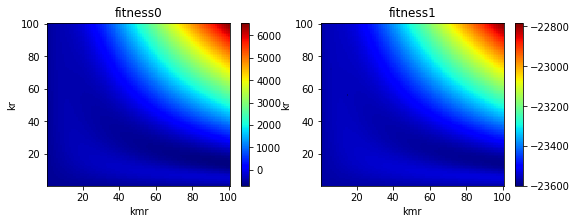

In [30]:
plot_figures(dfv, z_column='fitness')

These are potential landscapes. Max fitness = min potential.

We create `dff`: fitness landscape = -potential:

In [31]:
# Real copy
dff=[df.copy(deep=True) for df in dfv]
for df in dff:
    df['fitness']=-df['fitness']

# Run simulation

## Generate example trajectories colored according to the current state of the switching landscape

In [32]:
T1=1000.0
Ntraj1=1
dt1= 0.1 #0.001
minDt = 0. #1e-1
eta=0.1
D = 2. #1. #0.1
gamma = 1. #0.5
# alpha= # Will be given below
x0=5.
y0=5.
kr1=10.
kr2=20.
kmr1=90.
kmr2=100.

In [35]:
def test_alpha_param(alpha:float)->None:
   """Test simulation trajectories with a chosen value of the Levy flight parameter alpha.
   The function generates plots of the trajectory vs. time and the trajectory on the background of 
   two fitness landscapes (landscape 0 and landscape 1 switched in time during the simulation).

   Args:
       alpha (float): Levy flight parameter
   """

   output_data_file=f"outT{T1:.0e}N{Ntraj1:.0e}dt{dt1:.0e}_single_traj.csv"
   random.seed(time.time())
   run(
      output_dir,
      output_data_file,
      output_log_file,
      alpha=alpha, 
      D=D,
      gamma = gamma,
      dt=dt1, 
      minDt=minDt,
      eta=eta,
      T=T1, 
      t0=0., 
      x0=x0,
      y0=y0,
      kmr1=kmr1,
      kmr2=kmr2,
      kr1=kr1,
      kr2=kr2,
      Ntraj=Ntraj1,
      seed = random.randrange(100000), #785130160,
      potentialfile=potentialfile1,
      potentialfile_second=potentialfile2
      )



   print(open('./output/out.log', 'r').read()) 


   df=pd.read_csv(output_dir+output_data_file)

   fig, ax = plt.subplots(1,1)
   ax.plot(df.t, df.x , label=f"kmr, dt={dt1}")
   ax.plot(df.t, df.y , label=f"kr, dt={dt1}")

   ax.legend(loc='best', frameon=False)
   ax.set_xlabel("t")
   ax.set_ylabel("kmr, kr")
   f=[dff[i]['fitness'].iloc[0] -(dff[i]['fitness'].max()-dff[i]['fitness'].min())/15 \
      for i in range(Ndatafiles)]

   fmin=np.array(f)

   fmax=fmin+700
   plt.show()


   f=[dff[i]['fitness'].iloc[0] -(dff[i]['fitness'].max()-dff[i]['fitness'].min())/15 \
      for i in range(Ndatafiles)]

   fmin=np.array(f)

   fmax=fmin+700

   plot_figures(dflist=dff, z_column='fitness',fmin=fmin, fmax=fmax, trajdf=df, state_column='landscape')
   # display(df)
   return

alpha = 0.1
D = 2
gamma = 1
dt = 0.1
minDt = 0
eta = 0.1
T = 5000
t0 = 0
x0 = 5
y0 = 5
potential_file = ./input/landscape1.csv
potential_file_second = ./input/landscape2.csv
kmr1 = 90
kmr2 = 100
kr1 = 10
kr2 = 20
seed = 30516
Ntraj = 100
Only end points of the 100 trajectories will be printed as the output.
Running the simulation...

-------------launch_2D_ensemble_potential_file()-----------
potential_file=./input/landscape1.csv
potential_file_second=./input/landscape2.csv
Average time of simulation: 52.9728
Time simulation variance: 1977.21
Output written to STDOUT.
Done.

alpha = 0.1
D = 2
gamma = 1
dt = 0.1
minDt = 0
eta = 0.1
T = 5000
t0 = 0
x0 = 5
y0 = 5
potential_file = ./input/landscape1.csv
potential_file_second = ./input/landscape2.csv
kmr1 = 90
kmr2 = 100
kr1 = 10
kr2 = 20
seed = 32143
Ntraj = 100
Only end points of the 100 trajectories will be printed as the output.
Running the simulation...

-------------launch_2D_ensemble_potential_file()-----------
potential_file=./input

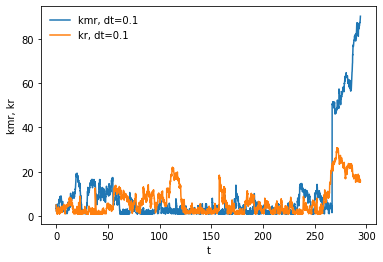

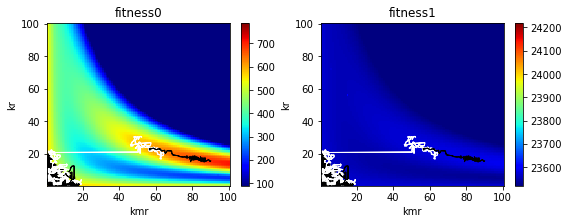

In [38]:
test_alpha_param(alpha=1.7)

fitness0: black, fitness1: white

It seems that the flatter landscape (1) facilitates valley crossing.

# TODO:

Plot takes long time. Try LineSegments.